# Informações do Dataset

### Objetivo
Tenho como objetivo treinar mais a linguagem Python e suas bibliotecas para a análise de dados.

### Dicionário

* Title = Nome do filme
* Distributor = Produtora responsável pelo filme
* Release Data = Data do lançamento
* Domestic Sales (in $)	= Vendas no país de origem
* International Sales (in $) = Vendas nos outros países
* World Sales (in $) = Vendas em todo o mundo
* Genre = Gênero do filme
* Movie Runtime	= Tempo de filme
* License = Classificação indicativa. 
* PG 13 - Algum material pode ser impróprio para crianças menores de 13 anos
* G - Público em geral, todas as idades admitidas
* PG - Algum material pode não ser adequado para crianças
* R – Restricted (Restrito) menores de 17 anos requer um acompanhamento dos pais ou responsáveis. Contém alguns materiais adultos.


# Importando a biblioteca e dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' % x) # não deixar em notação cientifica

In [2]:
df = pd.read_csv('Highest Holywood Grossing Movies.csv')

# Análise Descritiva

In [3]:
df.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [4]:
df.isnull().sum()

Unnamed: 0                      0
Title                           0
Movie Info                      0
Distributor                     0
Release Date                  118
Domestic Sales (in $)           0
International Sales (in $)      0
World Sales (in $)              0
Genre                           0
Movie Runtime                   0
License                       174
dtype: int64

In [5]:
df.shape

(918, 11)

In [6]:
df.describe()

,Unnamed: 0,Domestic Sales (in $),International Sales (in $),World Sales (in $)
count,918.00,918.00,918.00,918.00
mean,458.50,167746917.94,230143435.58,396866825.78
std,265.15,104036044.97,217601104.22,308262916.04
min,0.00,80360843.00,260.00,81600000.00
25%,229.25,101607071.75,88456200.25,200556355.25
50%,458.50,132135096.00,163881928.00,301941607.00
75%,687.75,191390485.50,288557651.00,475071823.50
max,917.00,936662225.00,2086738578.00,2847246203.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  918 non-null    int64 
 1   Title                       918 non-null    object
 2   Movie Info                  918 non-null    object
 3   Distributor                 918 non-null    object
 4   Release Date                800 non-null    object
 5   Domestic Sales (in $)       918 non-null    int64 
 6   International Sales (in $)  918 non-null    int64 
 7   World Sales (in $)          918 non-null    int64 
 8   Genre                       918 non-null    object
 9   Movie Runtime               918 non-null    object
 10  License                     744 non-null    object
dtypes: int64(4), object(7)
memory usage: 79.0+ KB


# Data Cleaning

### Como o python já possui a coluna index iremos remover a coluna "Unnamed: 0" e a coluna "Movie Info" não será util para a gente também então irei remove-la. 

In [8]:
del df['Unnamed: 0']
del df['Movie Info']

In [9]:
#Podemos verificar que existe duas colunas com alguns valores nulos sendo "Release Date" e "License"
df.isna().sum()

Title                           0
Distributor                     0
Release Date                  118
Domestic Sales (in $)           0
International Sales (in $)      0
World Sales (in $)              0
Genre                           0
Movie Runtime                   0
License                       174
dtype: int64

In [10]:
#Como os valores nulos representa uma pequena porcentagem do dataset não iremos fazer alterações uma vez que não faz sentido serem preenchidos com média ou mediana. 
df.isna().mean()

Title                        0.00
Distributor                  0.00
Release Date                 0.13
Domestic Sales (in $)        0.00
International Sales (in $)   0.00
World Sales (in $)           0.00
Genre                        0.00
Movie Runtime                0.00
License                      0.19
dtype: float64

In [11]:
## Deixar os valores em unidade de milhões para ficar melhor de visualizar nos gráficos.  

df[['Domestic Sales (in $)','International Sales (in $)','World Sales (in $)']]= df[['Domestic Sales (in $)','International Sales (in $)','World Sales (in $)'
]].apply(lambda x: x/(10**6))

In [12]:
df.head(3)

,Title,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,"December 16, 2015",936.66,1132.86,2069.52,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,"April 24, 2019",858.37,1939.13,2797.50,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,Avatar (2009),Twentieth Century Fox,"December 16, 2009",760.51,2086.74,2847.25,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13


# Análise Gráfica

### Maior número de filmes por produtora. 

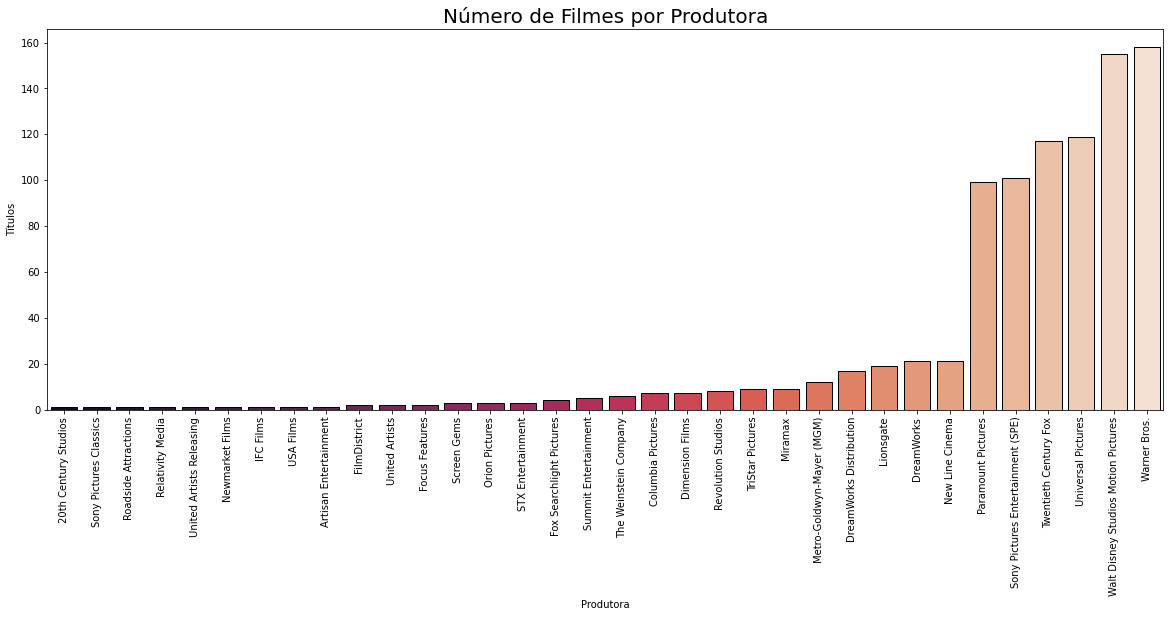

In [13]:
df_produt = df.groupby('Distributor', as_index=False)['Title'].count().sort_values('Title',ascending=True)
plt.subplots(figsize=(20,7))
sns.barplot(x='Distributor',y='Title', palette='rocket', edgecolor='black',
            data= df_produt)
plt.xticks(rotation=90)
plt.ylabel('Títulos')
plt.xlabel('Produtora')
plt.title('Número de Filmes por Produtora', fontsize= 20);

Como pode ser observado no gráfico acima as grandes companhias lideraram com folga o ranking de filmes de maiores sucessos.

### Produtora com maior número de vendas ($)

In [14]:
df_lucro = df.groupby('Distributor', as_index=False)['World Sales (in $)'].sum().sort_values('World Sales (in $)', ascending = True)

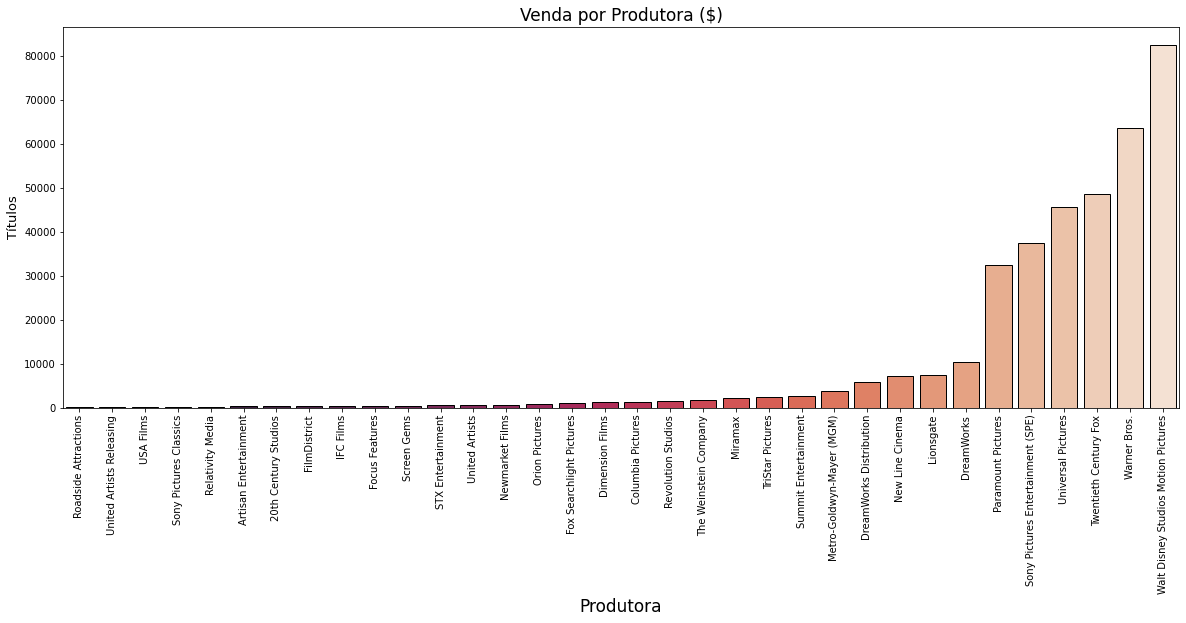

In [15]:
plt.subplots(figsize=(20,7))
sns.barplot(x='Distributor', y= 'World Sales (in $)', palette='rocket', edgecolor='black',
            data = df_lucro)
plt.xticks(rotation=90)
plt.ylabel('Títulos', fontsize= 13)
plt.xlabel('Produtora', fontsize= 17)
plt.title('Venda por Produtora ($)', fontsize= 17);

In [16]:
df_lucro.head()

,Distributor,World Sales (in $)
19,Roadside Attractions,86.09
30,United Artists Releasing,203.78
28,USA Films,207.52
22,Sony Pictures Classics,213.53
17,Relativity Media,226.90


Podemos observer que mesmo com o número de filmes menor a Walt Disney tem um número de vendas significativamente maior, cerca de $18.775.000,000.

### Gênero de filmes que mais aparece no ranking. 

In [17]:
coluna_genre = df.Genre
palavra = ''
lista_palavra = []
for genero_linha in coluna_genre:
    genero_linha = genero_linha.replace("'", '').replace('[', '').replace(',', '')
    
    tamanho = len(genero_linha)
    indice = 0

    for j in range(tamanho):
        if (genero_linha[indice] == ' ') | (genero_linha[indice] == ']'):
            lista_palavra.append(palavra)
            palavra = ''
        else:
            palavra = palavra + genero_linha[indice]
        indice += 1

df_genero = pd.DataFrame({'genero': np.array(lista_palavra)})

In [18]:
df_genero.value_counts()

genero     
Adventure      432
Comedy         399
Action         396
Drama          300
Thriller       230
Sci-Fi         228
Family         227
Fantasy        227
Romance        142
Animation      140
Crime          136
Mystery         87
Musical         51
Horror          45
Biography       39
Music           33
Sport           28
War             27
History         22
Western         14
Documentary      2
dtype: int64

In [19]:
df_genero['Quantidade'] = 1
df_genero = df_genero.groupby('genero', as_index=False)['Quantidade'].sum().sort_values('Quantidade',ascending=True)

In [20]:
df_genero.head()

,genero,Quantidade
6,Documentary,2
20,Western,14
10,History,22
19,War,27
17,Sport,28


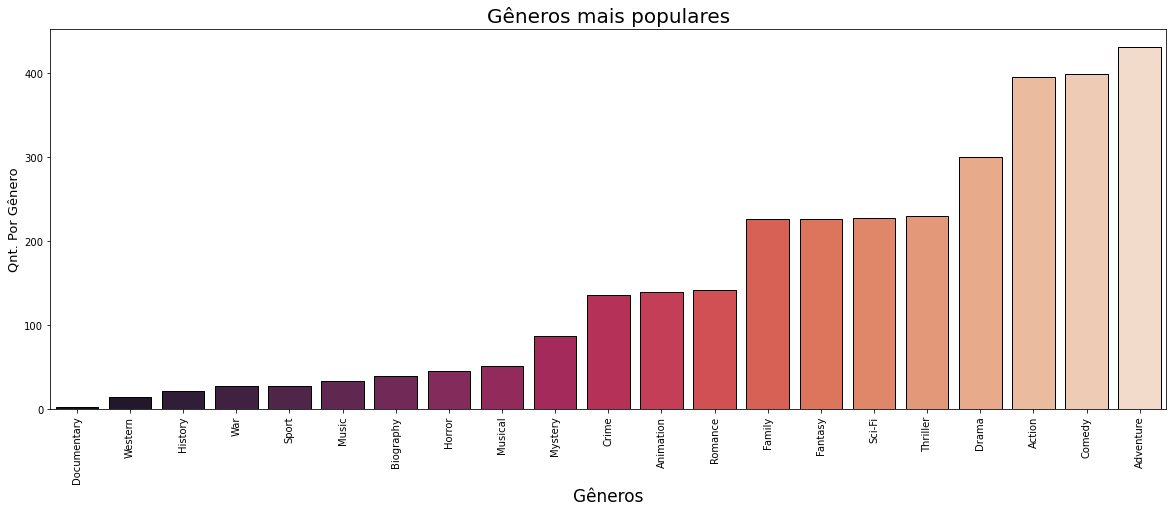

In [21]:
plt.subplots(figsize=(20,7))
sns.barplot(x='genero', y = 'Quantidade', palette='rocket', edgecolor='black',
            data = df_genero)
plt.xticks(rotation=90)
plt.ylabel('Qnt. Por Gênero', fontsize= 13)
plt.xlabel('Gêneros', fontsize= 17)
plt.title('Gêneros mais populares', fontsize= 20);

### Quantidade de filmes das maiores bilheterias por ano. 

In [22]:
df_ano = df.copy()

In [23]:
df_ano.head()

,Title,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,"December 16, 2015",936.66,1132.86,2069.52,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,"April 24, 2019",858.37,1939.13,2797.50,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,Avatar (2009),Twentieth Century Fox,"December 16, 2009",760.51,2086.74,2847.25,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,Black Panther (2018),Walt Disney Studios Motion Pictures,NaN,700.43,647.17,1347.60,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,Avengers: Infinity War (2018),Walt Disney Studios Motion Pictures,NaN,678.82,1369.54,2048.36,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [24]:
df_ano['Release Date']= pd.to_datetime(df_ano['Release Date'])
df_ano['Release Date'] = df_ano['Release Date'].dt.year
df_ano = df_ano.groupby('Release Date', as_index=False)['Title'].count()

In [25]:
df_ano.head()

,Release Date,Title
0,1972.00,1
1,1975.00,1
2,1977.00,1
3,1978.00,2
4,1979.00,2


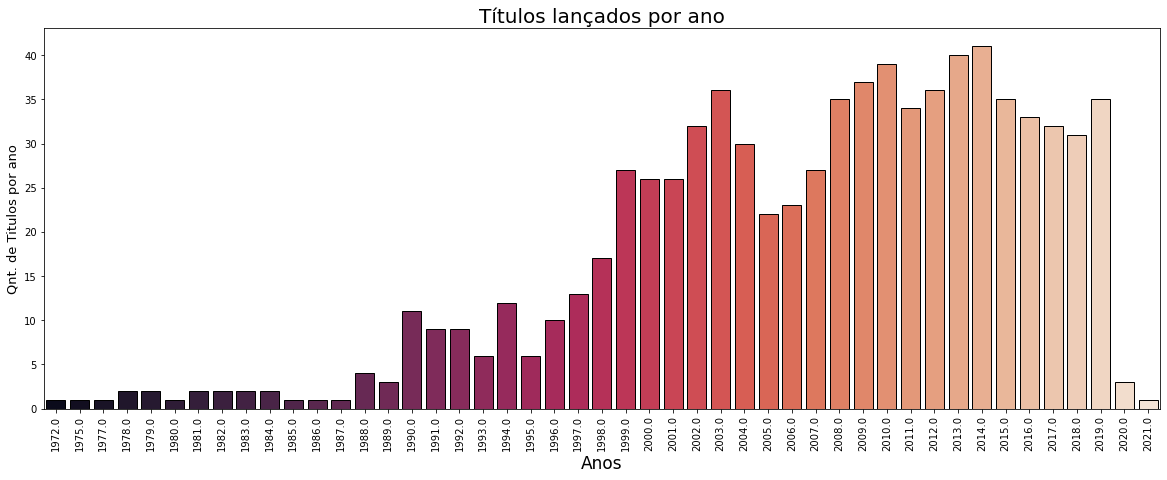

In [26]:
plt.subplots(figsize=(20,7))
sns.barplot(x='Release Date', y = 'Title', palette='rocket', edgecolor='black',
            data = df_ano)
plt.xticks(rotation=90)
plt.ylabel('Qnt. de Titulos por ano', fontsize= 13)
plt.xlabel('Anos', fontsize= 17)
plt.title('Títulos lançados por ano', fontsize= 20);

### Faturamento por ano

In [27]:
df_venda_ano = df.copy()
df_venda_ano['Release Date']= pd.to_datetime(df_venda_ano['Release Date'])
df_venda_ano['Release Date'] = df_venda_ano['Release Date'].dt.year

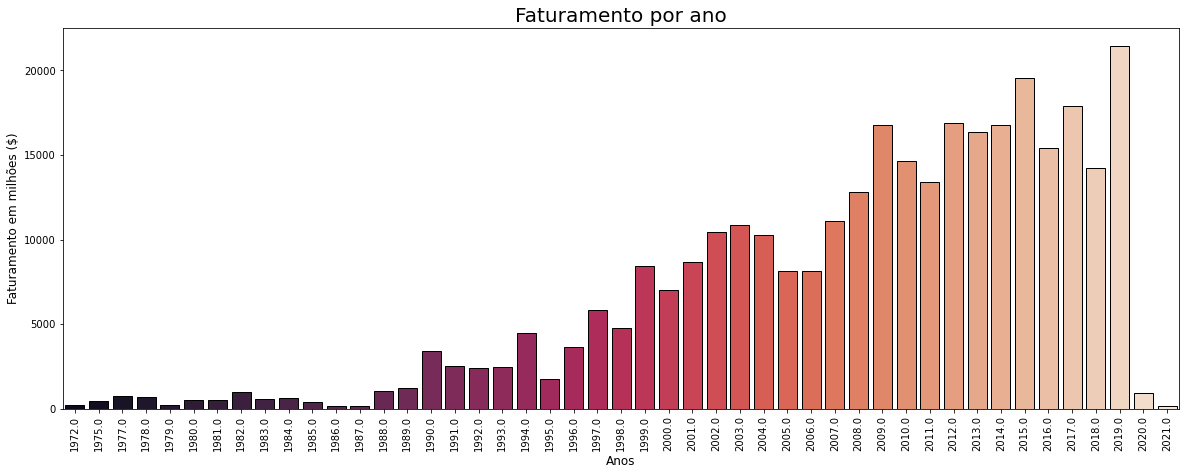

In [28]:
plt.subplots(figsize=(20,7))
sns.barplot(x='Release Date', y = 'World Sales (in $)', palette='rocket', edgecolor='black',
            data = df_venda_ano.groupby('Release Date', as_index=False)['World Sales (in $)'].sum())
plt.xticks(rotation=90)
plt.ylabel('Faturamento em milhões ($)', fontsize= 12)
plt.xlabel('Anos', fontsize= 12)
plt.title('Faturamento por ano', fontsize= 20);

### Títulos por ano.

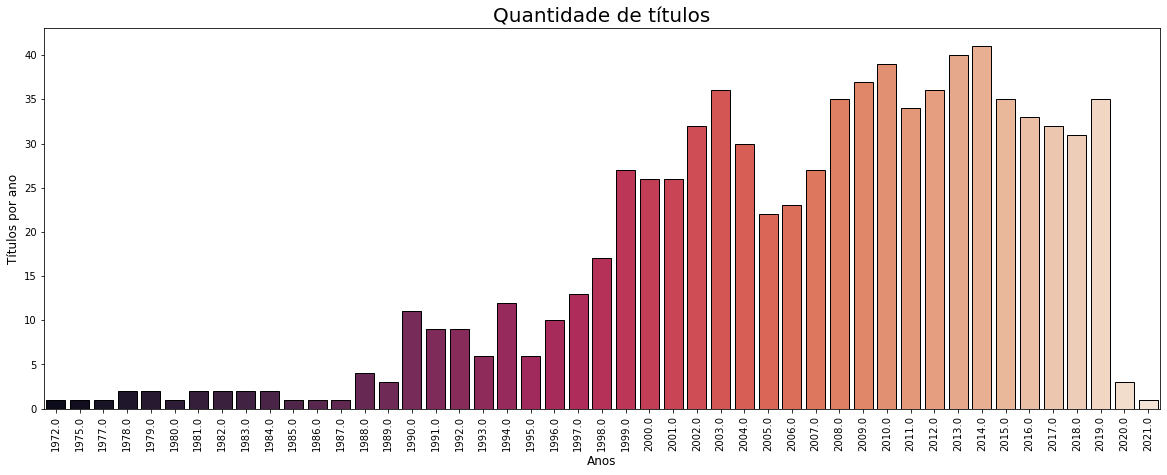

In [29]:
plt.subplots(figsize=(20,7))
sns.barplot(x='Release Date', y = 'Title', palette='rocket', edgecolor='black',
            data = df_venda_ano.groupby('Release Date', as_index=False)['Title'].count())
plt.xticks(rotation=90)
plt.ylabel('Títulos por ano', fontsize= 12)
plt.xlabel('Anos', fontsize= 12)
plt.title('Quantidade de títulos', fontsize= 20);

### Classificação indicativa que mais aparece no ranking. 

In [30]:
df.head()

,Title,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,"December 16, 2015",936.66,1132.86,2069.52,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,"April 24, 2019",858.37,1939.13,2797.50,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,Avatar (2009),Twentieth Century Fox,"December 16, 2009",760.51,2086.74,2847.25,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,Black Panther (2018),Walt Disney Studios Motion Pictures,NaN,700.43,647.17,1347.60,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,Avengers: Infinity War (2018),Walt Disney Studios Motion Pictures,NaN,678.82,1369.54,2048.36,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


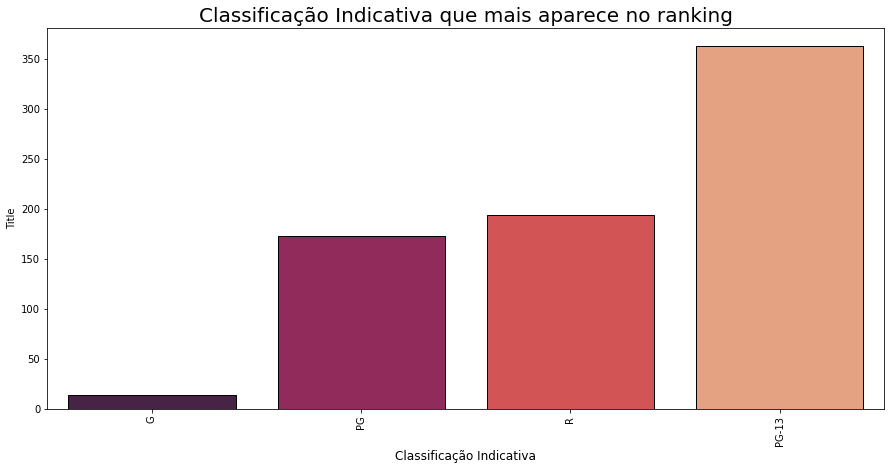

In [31]:
plt.subplots(figsize=(15,7))
sns.barplot(x='License', y = 'Title', palette='rocket', edgecolor='black',
            data = df.groupby('License', as_index=False)['Title'].count().sort_values('Title', ascending=True))
plt.xticks(rotation=90)
plt.xlabel('Classificação Indicativa', fontsize= 12)
plt.title('Classificação Indicativa que mais aparece no ranking', fontsize= 20);

Dicionário do ranking:
* PG 13 - Algum material pode ser impróprio para crianças menores de 13 anos
* G - Público em geral, todas as idades admitidas
* PG - Algum material pode não ser adequado para crianças
* R – Restricted (Restrito) menores de 17 anos requer um acompanhamento dos pais ou responsáveis. Contém alguns materiais adultos.

### Os 10 filmes com maior bilheteria do ranking. 

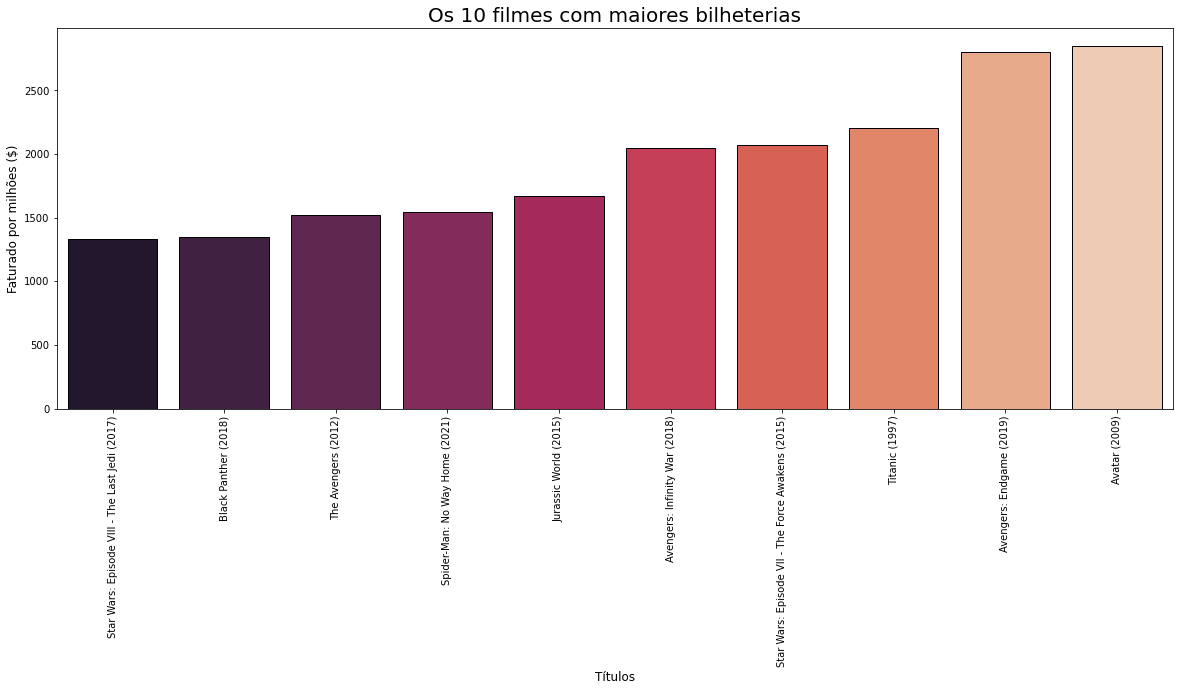

In [32]:
plt.subplots(figsize=(20,7))
sns.barplot(x='Title', y = 'World Sales (in $)', palette='rocket', edgecolor='black',
            data = df.head(10).sort_values('World Sales (in $)', ascending=True))
plt.xticks(rotation=90)
plt.ylabel('Faturado por milhões ($)', fontsize= 12)
plt.xlabel('Títulos', fontsize= 12)
plt.title('Os 10 filmes com maiores bilheterias', fontsize= 20);

### Os 10 filmes com piores bilheterias do ranking

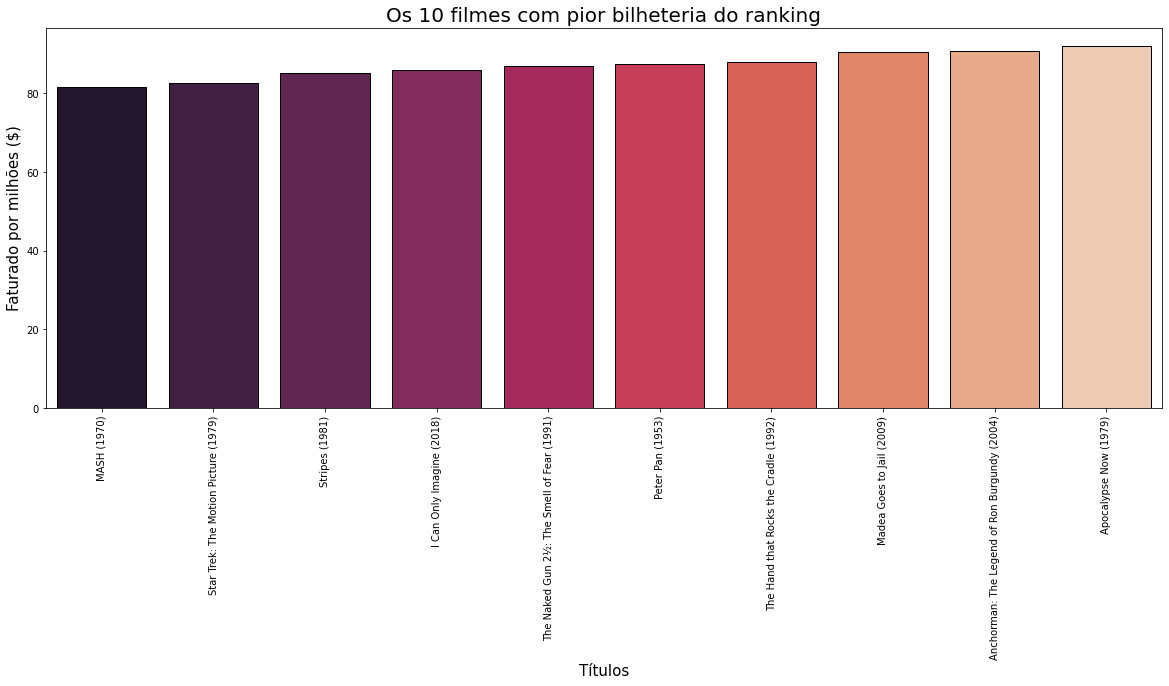

In [33]:
plt.subplots(figsize=(20,7))
sns.barplot(x='Title', y= 'World Sales (in $)', palette='rocket', edgecolor='black',
            data = df.sort_values('World Sales (in $)', ascending=True).head(10))

plt.xticks(rotation=90)
plt.xlabel('Títulos', fontsize=15)
plt.ylabel('Faturado por milhões ($)', fontsize=15)
plt.title('Os 10 filmes com pior bilheteria do ranking', fontsize=20);